<a href="https://colab.research.google.com/github/AdiGiriIIT/AdiGiriIIT/blob/main/Basics_of_Image_Processing_28_01_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This exercise aims to make you comfortable with the basic image processing tools and libraries. It will serve as a starting point before you dive deep into the course.

### Let's first import basic image processing or related libraries.

In [4]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.
import cv2


#### First load an image and visualize it.

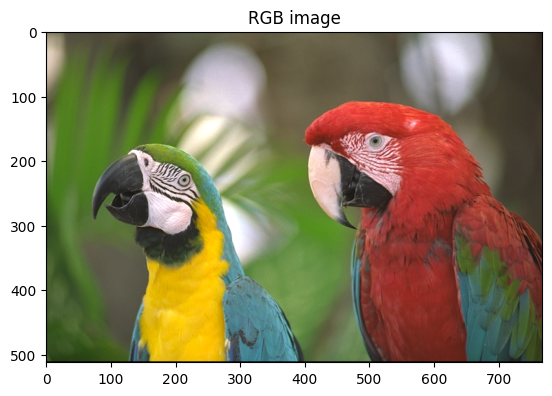

In [5]:
image = plt.imread("macau.png")
plt.imshow(image)
plt.title("RGB image")
plt.show()

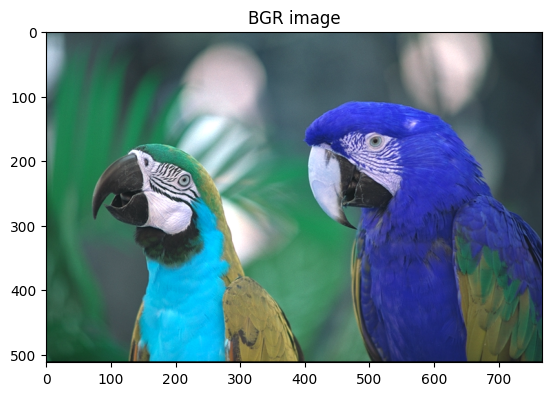

In [6]:
image = cv2.imread("macau.png")
plt.imshow(image)
plt.title("BGR image")
plt.show()

OpenCV imports images in B, G, R format so it takes R, G, B values as B, G, R so the parrot turns blue.

This can be corrected by using cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

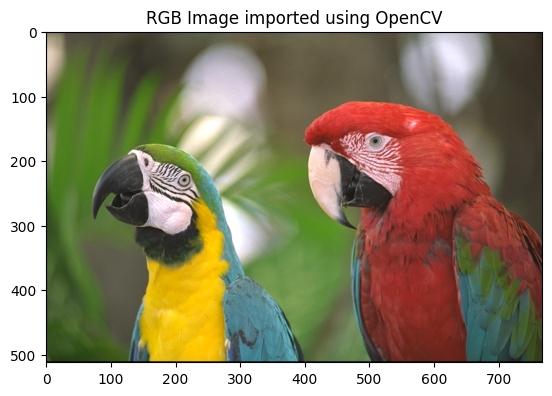

In [7]:
# to correct this, generally cv2.cvtColor(image, cv2.COLOR_BGR2RGB) is used
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("RGB Image imported using OpenCV")
plt.show()

# 1. Image Information

#### It is always good to know basic image details, such as its dimensions, before one proceeds for the experiments.

### Task1.1 : write code to find image dimension and print it

In [8]:
print("Image dimension:", image.shape)      # returns tuple(h, w, c)

Image dimension: (512, 768, 3)


### Task 1.2 : write code to find image intensity datatype

In [9]:
print("Image datatype:", image.dtype)

Image datatype: uint8


#### Exercise:
#### Is this image RGB (no of channels?), gray or binary (intensity range?)? What can you say about aspect ratio (defined as width/height) of this image?



In [10]:
## Code the above exercise
channels = image.shape[2]
if channels==3:
  print("========== Image is RGB ============")
elif channels==1:
  print("========Image is gray==========")
height = image.shape[0]
width = image.shape[1]
print("########## Aspect ratio:", width/height, "#############")

========== Image is RGB ============
########## Aspect ratio: 1.5 #############


#### Task1.3:  Visualization of each channel

An RGB image can be decomposed into three channels, Red(R), Green(G), Blue(B). In this subsection, let's visualize each channel separately.




In [11]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here

    output = image[:,:,channel]


    return output    # 'output' is image's particular channel values

Red channel Values: [[116 117 120 ...  46  46  47]
 [122 122 123 ...  47  47  46]
 [126 126 127 ...  47  46  46]
 ...
 [ 61  62  65 ...  59  51  43]
 [ 61  61  62 ...  57  48  46]
 [  0   0   0 ...   0   0   0]]


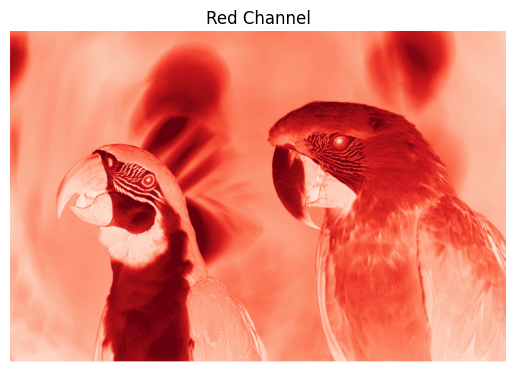

In [12]:
# Visualize red, green and blue channels

R = VisualizeChannel(image, 0)
print("Red channel Values:", R)
plt.title("Red Channel")
plt.imshow(R, cmap = "Reds")
plt.axis("off")
plt.show()



Green channel Values: [[116 117 120 ...  40  40  41]
 [119 119 120 ...  41  41  40]
 [123 123 124 ...  41  40  40]
 ...
 [ 85  86  89 ...  73  64  56]
 [ 85  85  86 ...  70  62  59]
 [  0   0   0 ...   0   0   0]]


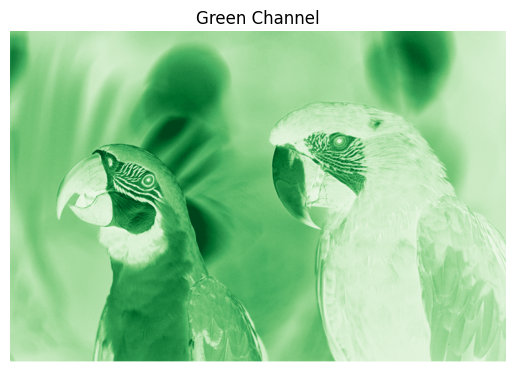

In [13]:
# Visualize red, green and blue channels

G = VisualizeChannel(image, 1)
print("Green channel Values:", G)
plt.title("Green Channel")
plt.imshow(G, cmap = "Greens")
plt.axis("off")
plt.show()



Blue channel Values: [[88 89 92 ... 29 29 31]
 [92 92 93 ... 31 31 29]
 [94 94 95 ... 31 29 29]
 ...
 [32 33 36 ... 38 32 24]
 [29 32 33 ... 35 27 25]
 [ 0  0  0 ...  0  0  0]]


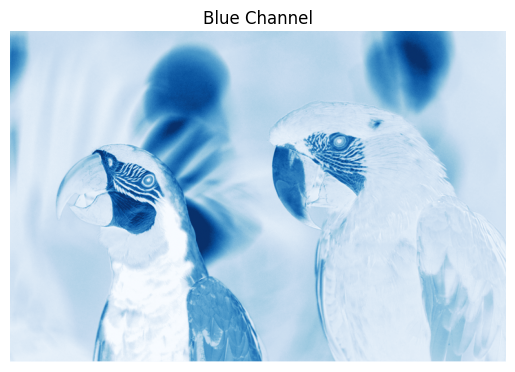

In [14]:
# Visualize red, green and blue channels

B = VisualizeChannel(image, 2)
print("Blue channel Values:", B)
plt.title("Blue Channel")
plt.imshow(B, cmap = "Blues")
plt.axis("off")
plt.show()



Can you also comment on the maximum and minimum intensity values of each channel? What can you say about the range of intensity values?

In [15]:
print("Red channel:" , np.min(R), R.min())
print("\n")
print(f"Red channel\nMax: {R.max()}\nMin: {R.min()}\n")
print(f"Green channel\nMax: {G.max()}\nMin: {G.min()}\n")
print(f"Blue channel\nMax: {B.max()}\nMin: {B.min()}\n")

Red channel: 0 0


Red channel
Max: 255
Min: 0

Green channel
Max: 255
Min: 0

Blue channel
Max: 255
Min: 0



# 2. Intensity Manipulations

#### Preliminary Task: Normalization

Write a code to normalise the image in the range 0 to 1

In [16]:
def NormIm(image):
    '''
    This function normalises an image to 0 to 1 range
    image: Image
    '''
    # Write your code here (do note that sometimes the image may have already been normalised, so these cases need to be taken care of)
    nimage = image/255

    return nimage

image = NormIm(image)

### Task 2.1: RGB to Gray  

*We* may need a gray image for some of our applications. One can also convert RGB to gray to reduce computational complexity. For this part, we will convert an RGB image to grayscale. Refer this link for explanation: https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

In [17]:
def RGB2Gray(image, mode):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    # For image classification, gray is enough as rgb takes require more memory
    # Two methods to convert it Average method , Weighted method or luminosity method

    if mode=="average":
      #Average Method

      gray_image = np.mean(image, axis = 2)

    elif mode=='weighted':

      # Weighted method

      R = VisualizeChannel(image, 0)
      G = VisualizeChannel(image, 1)
      B = VisualizeChannel(image, 2)

      gray_image = (0.2989 * R) + (0.5870 * G) + (0.1140 * B)



    return gray_image       #'gray' is grayscale image, converted from RGB image

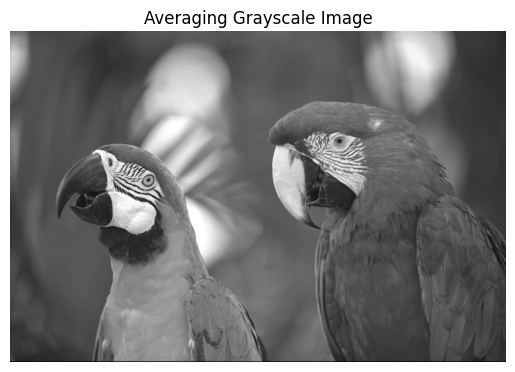

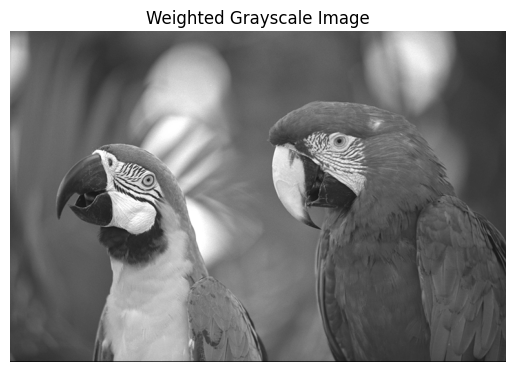

In [18]:
gray_image = RGB2Gray(image, "average")
gray_weighted = RGB2Gray(image, "weighted")


# Display and compare the grayscale image using average method and  weighted method

plt.title("Averaging Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.show()

plt.title("Weighted Grayscale Image")
plt.imshow(gray_weighted, cmap='gray')
plt.axis("off")
plt.show()



We can also convert a gray image to a binary image. For task2.2, consider a gray image as input (you may take the output from task2.1 as input).

Write code to threshold a gray image such that

I(x,y) = 1 if I(x,y) >= T
       = 0   if I(x,y) < T   where T is threshold

Though there are proper methods( such as the Otsu method) to find a suitable T, we will not go into details of those algorithms and randomly select T values and visualize the result.

### Task 2.2 : Gray to Binary

Before you proceed to code, Can you comment on the valid range of T?




Valid range of T = [0,1] since the image is normalized.

In [19]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray = RGB2Gray(image, "average")

    else:
        gray = image

    print(gray.shape)

    print(f"Min_gray = {gray.min()} Max_gray = {gray.max()} ")

    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg = gray.copy()
    for i in range(gray.shape[0]):
      for j in range(gray.shape[1]):
        if bimg[i][j] >= T:
          bimg[i][j] = 1
        else:
          bimg[i][j] = 0

    #write code to visualize the resultant image

    plt.imshow(bimg, cmap = "gray")
    plt.axis('off')
    plt.title("Binary image")
    plt.show()




    return bimg


(512, 768)
Min_gray = 0.0 Max_gray = 1.0 


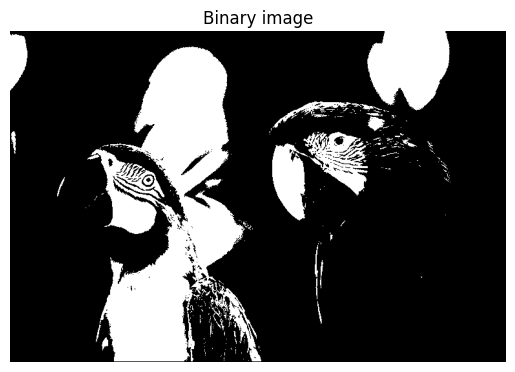

In [20]:
b = Gray2Binary(image, 0.5)


An image is nothing but a matrix. Hence one can perform all kinds of mathematical operations on an image just like a matrix.



To convince ourselves with the above statement, let's crop a section of a gray image, print its value, and perform some mathematical operations. For a better data display, we will cut only 5*5 areas of the gray image.

### Task 2.3:  Crop a 5*5 section of a gray image

In [21]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray

    flag = len(image.shape)

    if flag == 3:
        gray = RGB2Gray(image, "average")
    else:
        gray = image


    # write code to select 5*5 rectangular patch defined as above (say it 'patch')

    patch = gray[r0:r0+5, c0:c0+5]

    # visualize patch and print its value
    plt.imshow(patch, cmap = "gray")
    plt.axis('off')
    plt.title("Image patch")
    plt.show()
    print(patch)

    return patch

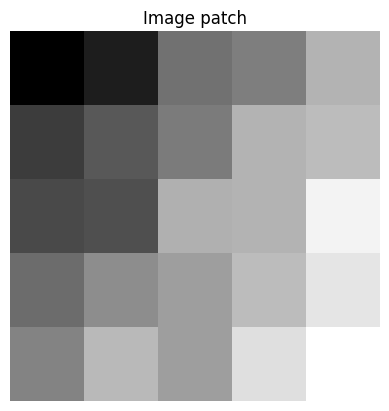

[[0.75816993 0.77124183 0.80915033 0.81437908 0.8379085 ]
 [0.78562092 0.79738562 0.8130719  0.8379085  0.84183007]
 [0.79084967 0.79346405 0.83660131 0.8379085  0.86666667]
 [0.80653595 0.82091503 0.82875817 0.84183007 0.86013072]
 [0.81699346 0.84052288 0.82875817 0.85751634 0.87189542]]


In [22]:
patch = ImageCrop(image, 200, 250)
# print(patch)

### Exercise:


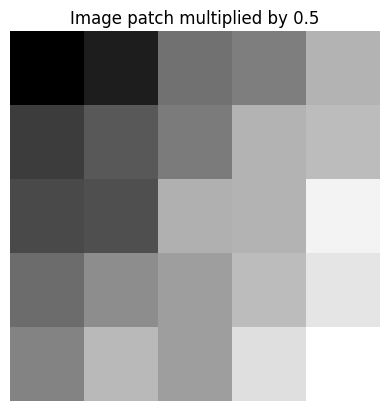

[[0.37908497 0.38562092 0.40457516 0.40718954 0.41895425]
 [0.39281046 0.39869281 0.40653595 0.41895425 0.42091503]
 [0.39542484 0.39673203 0.41830065 0.41895425 0.43333333]
 [0.40326797 0.41045752 0.41437908 0.42091503 0.43006536]
 [0.40849673 0.42026144 0.41437908 0.42875817 0.43594771]]


In [23]:
patch_1 = patch*(0.5)
# visualize patch and print its value
plt.imshow(patch_1, cmap = "gray")
plt.axis('off')
plt.title("Image patch multiplied by 0.5")
plt.show()
print(patch_1)


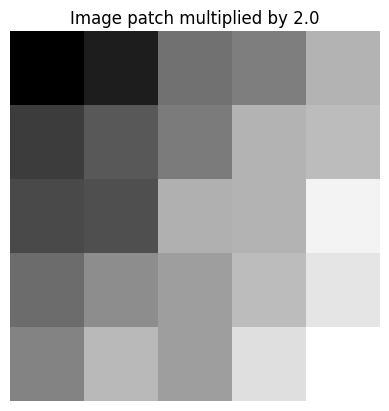

[[1.51633987 1.54248366 1.61830065 1.62875817 1.67581699]
 [1.57124183 1.59477124 1.62614379 1.67581699 1.68366013]
 [1.58169935 1.5869281  1.67320261 1.67581699 1.73333333]
 [1.6130719  1.64183007 1.65751634 1.68366013 1.72026144]
 [1.63398693 1.68104575 1.65751634 1.71503268 1.74379085]]


In [24]:
patch_2 = patch*(2)
# visualize patch and print its value
plt.imshow(patch_2, cmap = "gray")
plt.axis('off')
plt.title("Image patch multiplied by 2.0")
plt.show()
print(patch_2)


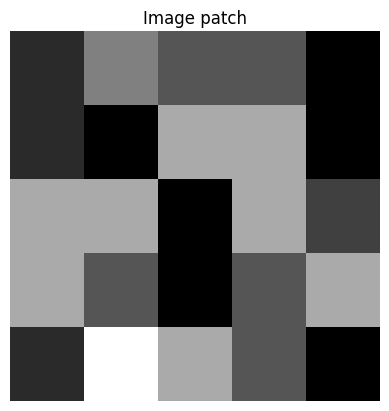

[[0.2875817  0.29281046 0.29019608 0.29019608 0.28496732]
 [0.2875817  0.28496732 0.29542484 0.29542484 0.28496732]
 [0.29542484 0.29542484 0.28496732 0.29542484 0.28888889]
 [0.29542484 0.29019608 0.28496732 0.29019608 0.29542484]
 [0.2875817  0.30065359 0.29542484 0.29019608 0.28496732]]


In [25]:
patch_3 = ImageCrop(image, 100, 150)


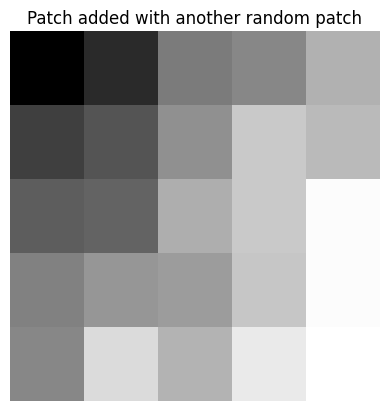

[[1.04575163 1.06405229 1.09934641 1.10457516 1.12287582]
 [1.07320261 1.08235294 1.10849673 1.13333333 1.12679739]
 [1.08627451 1.08888889 1.12156863 1.13333333 1.15555556]
 [1.10196078 1.11111111 1.11372549 1.13202614 1.15555556]
 [1.10457516 1.14117647 1.12418301 1.14771242 1.15686275]]


In [26]:
patch_add = patch+patch_3
# visualize patch and print its value
plt.imshow(patch_add, cmap = "gray")
plt.axis('off')
plt.title("Patch added with another random patch")
plt.show()
print(patch_add)


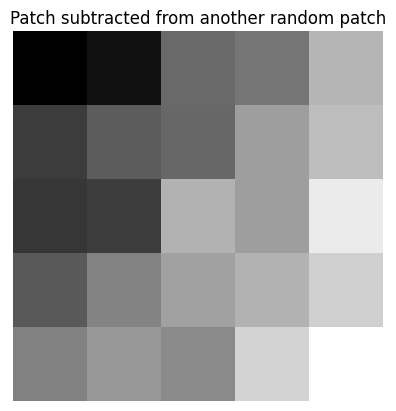

[[0.47058824 0.47843137 0.51895425 0.52418301 0.55294118]
 [0.49803922 0.5124183  0.51764706 0.54248366 0.55686275]
 [0.49542484 0.49803922 0.55163399 0.54248366 0.57777778]
 [0.51111111 0.53071895 0.54379085 0.55163399 0.56470588]
 [0.52941176 0.53986928 0.53333333 0.56732026 0.5869281 ]]


In [27]:
patch_sub = patch-patch_3
# visualize patch and print its value
plt.imshow(patch_sub, cmap = "gray")
plt.axis('off')
plt.title("Patch subtracted from another random patch")
plt.show()
print(patch_sub)


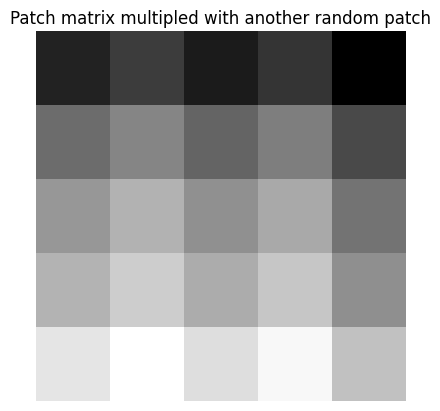

[[1.16042889 1.16907172 1.15805374 1.16639241 1.14895126]
 [1.18507924 1.19372549 1.18272459 1.1912068  1.17342561]
 [1.19954889 1.20855739 1.19712589 1.20572429 1.18767312]
 [1.20891623 1.21782904 1.20673929 1.21531035 1.19699603]
 [1.22557991 1.2345679  1.22351232 1.23210389 1.21355034]]


In [28]:
patch_mul = patch@patch_3
# visualize patch and print its value
plt.imshow(patch_mul, cmap = "gray")
plt.axis('off')
plt.title("Patch matrix multipled with another random patch")
plt.show()
print(patch_mul)

We have verified that it follows all the regular rules of matrix addition, subtraction and multiplication

### Task2.4: Uniform Brightness Scaling


##### Hopefully, you are convinced that an image is a matrix. Hence we can perform multiplication/division or addition/subtraction operations. These operations will change the brightness value of the image; can make an image brighter or darker depending on the multiplying/scaling factor. For this task, let's change the image brightness uniformly.
Consider scale to be 0.3,0.5,1,2 for four different cases. What is your observation?

Observation:
For scaling factor in between 0 to 1 image is dark. For scaling facor > 1, image is getting bright.

In [29]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'values need to be multiplied
    '''
    #write your code here

    # Apply scaling
    output = image * scale


    # Display the scaled image
    plt.imshow(output)
    plt.axis('off')
    plt.title("Scaled image")
    plt.show()
    plt.imsave("brimage.png", output)

    return output       #replace output with the variable name you used for final result


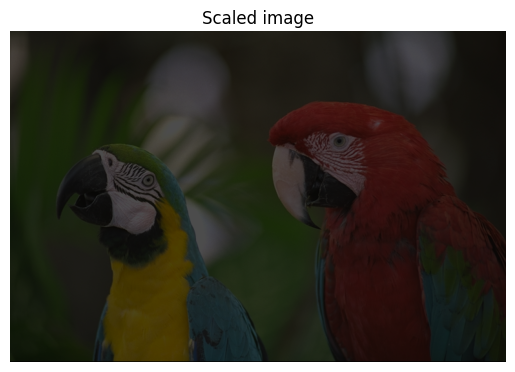

scaled: min=0.0, max=0.3


In [30]:
scaled = UniformBrightScaling(image, 0.3)
print(f"scaled: min={scaled.min()}, max={scaled.max()}")

# 3. Image Filtering

In this section, you will perform some of the image filtering techniques.


Convolution is one of the most widely used operations for images. Convolution can be used as a feature extractor; different kernel results in various types of features.
Refer   https://en.wikipedia.org/wiki/Kernel_(image_processing) to see few examples of kernel.


In [31]:
def feature_extractor(image,kernel): # only for 3 X 3
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        #write code to convert it to gray scale
        image = RGB2Gray(image, "average")

 # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)

    r, c = image.shape

    # Create a zero array for the output image
    output = np.zeros((r, c))

    # Create a zero array with padding (size (r+2, c+2))
    pad_img = np.zeros((r+2, c+2))

    # Copy the gray image to the center of the padded image
    pad_img[1:r+1, 1:c+1] = image

    #Flip the kernel horizontally and vertically, as in convolution (kernel is flipped)
    kernel = np.flipud(np.fliplr(kernel))

    # Convolve the image with the kernel
    for row in range(1, r+1):
        for col in range(1, c+1):
            # Extract the 3x3 patch centered at (row, col)
            patch = pad_img[row-1:row+2, col-1:col+2]

            # Flatten the patch and the kernel, then take the dot product
            output[row-1, col-1] = np.sum(patch * kernel)

    #now copy gray image to above created array at location starting from (1,1)



    return output



In [32]:
#defining all kernels

edge  = np.array([[0, -1, 0],
                  [-1, 4, -1],
                  [0, -1, 0]])

horizontal_edge = np.array([[-1, -1, -1],
                            [0, 0, 0],
                            [1, 2, 1]])

vertical_edge = np.array([[-1, 0, 1],
                          [-1, 0, 2],
                          [-1, 0, 1]])

identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])

sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

box_blur = np.array([[1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9]])

gaussian_blur = np.array([[1/16, 1/8, 1/16],
                          [1/8, 1/4, 1/8],
                          [1/16, 1/8, 1/16]])




(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

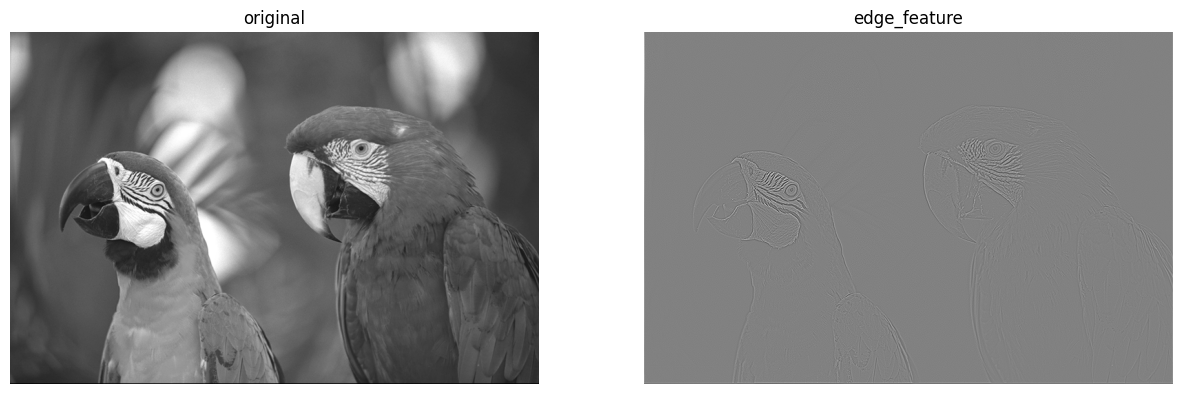

In [33]:
edge_feature = feature_extractor(gray_image, edge)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plot green channel
axes[0].imshow(gray_image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(edge_feature, cmap = "gray")
axes[1].set_title("edge_feature")
axes[1].axis("off")

### Task 3.1 Similarly check for vertical and horizontal edges

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

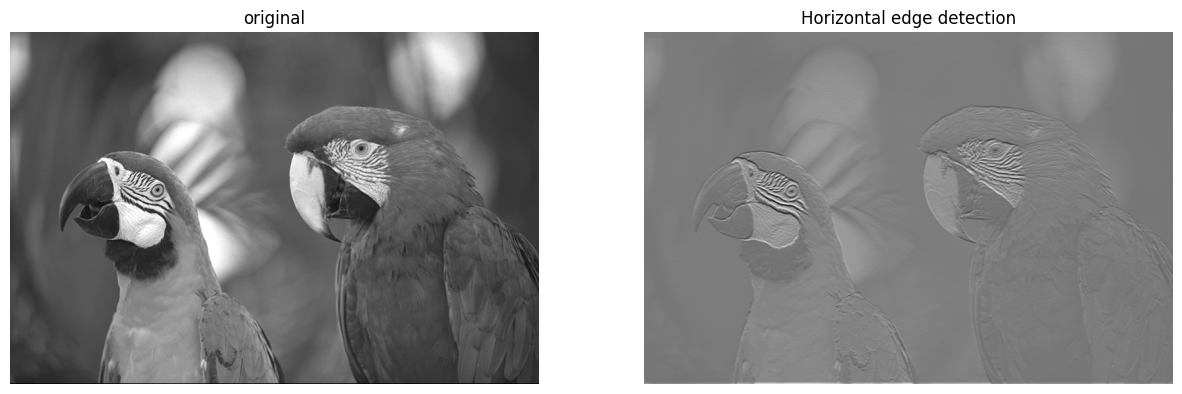

In [34]:
hori_edge_feature = feature_extractor(gray_image, horizontal_edge)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plot green channel
axes[0].imshow(gray_image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(hori_edge_feature, cmap = "gray")
axes[1].set_title("Horizontal edge detection")
axes[1].axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

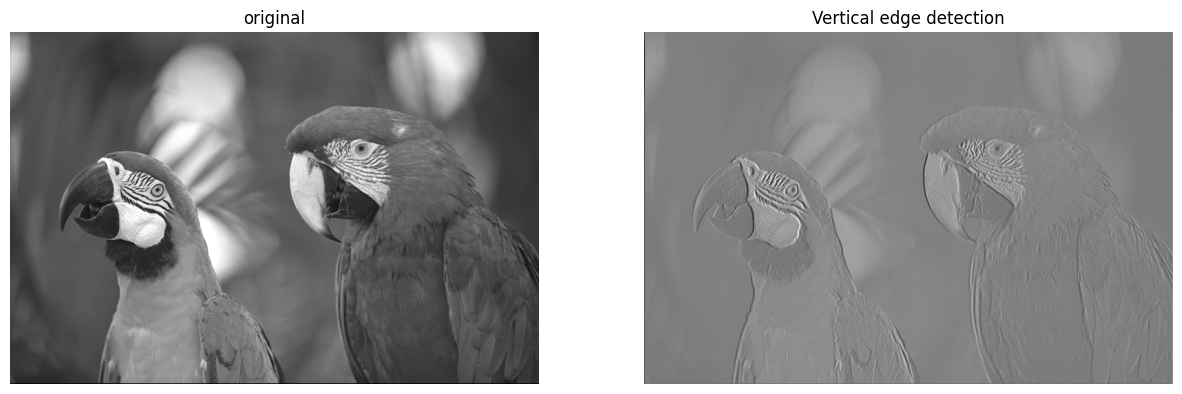

In [35]:
vert_edge_feature = feature_extractor(gray_image, vertical_edge)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plot green channel
axes[0].imshow(gray_image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(vert_edge_feature, cmap = "gray")
axes[1].set_title("Vertical edge detection")
axes[1].axis("off")

Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

for the above case, consider all 3 * 3 kernels from https://en.wikipedia.org/wiki/Kernel_(image_processing). What was your observation with different kernels? You can also play with other kernels, take any 3*3 matrix of your choice, convolve it with a gray image and see if it extracts some image features.

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

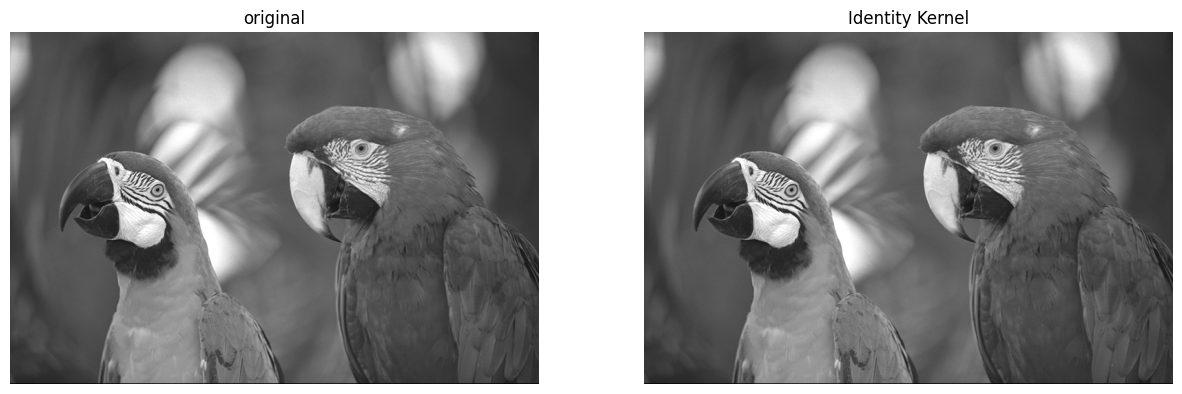

In [36]:
edge_feature = feature_extractor(gray_image, identity)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plot green channel
axes[0].imshow(gray_image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(edge_feature, cmap = "gray")
axes[1].set_title("Identity Kernel")
axes[1].axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

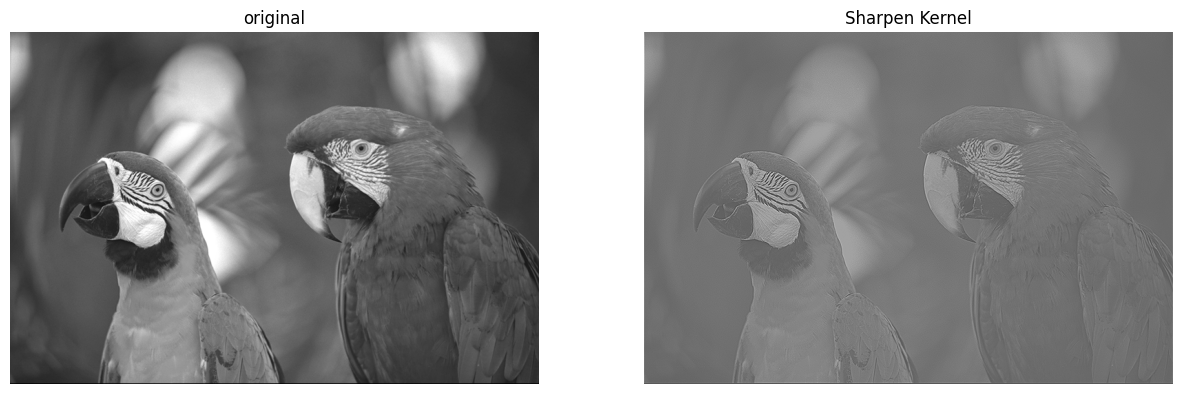

In [37]:
edge_feature = feature_extractor(gray_image, sharpen)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plot green channel
axes[0].imshow(gray_image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(edge_feature, cmap = "gray")
axes[1].set_title("Sharpen Kernel")
axes[1].axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

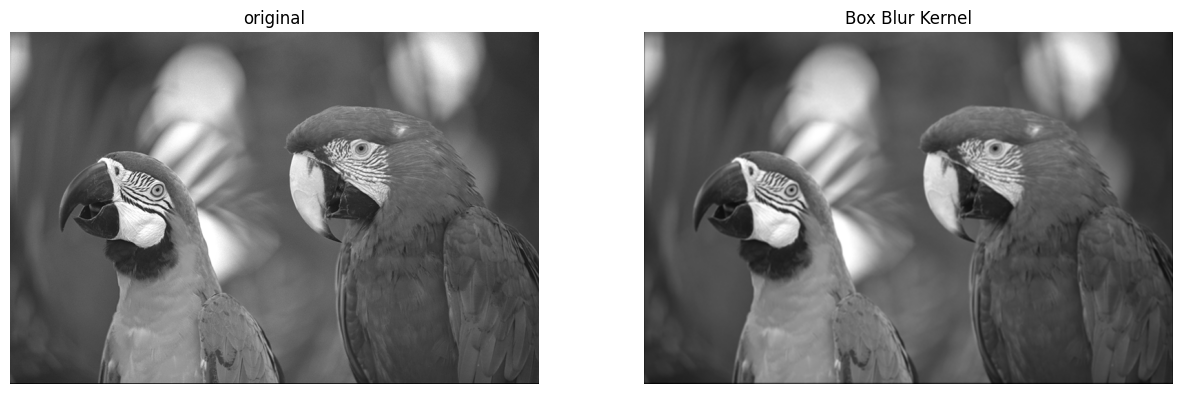

In [38]:
edge_feature = feature_extractor(gray_image, box_blur)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plot green channel
axes[0].imshow(gray_image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(edge_feature, cmap = "gray")
axes[1].set_title("Box Blur Kernel")
axes[1].axis("off")

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

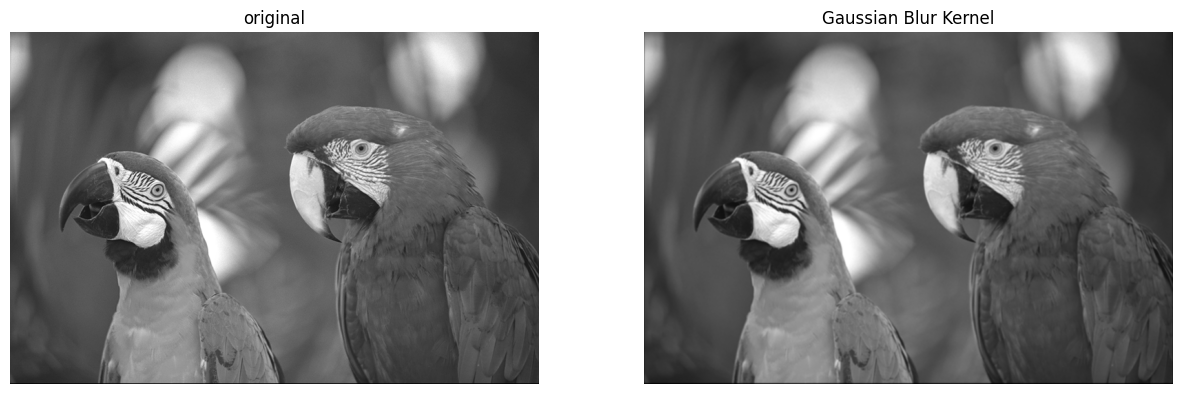

In [39]:
edge_feature = feature_extractor(gray_image, gaussian_blur)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plot green channel
axes[0].imshow(gray_image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(edge_feature, cmap = "gray")
axes[1].set_title("Gaussian Blur Kernel")
axes[1].axis("off")

In [43]:
print(f"Original gray image min: {gray_image.min():.4f}, max: {gray_image.max():.4f}")
print(f"Gaussian blurred image min: {edge_feature.min():.4f}, max: {edge_feature.max():.4f}")

difference = np.abs(gray_image - edge_feature)

# print(f"\nAbsolute difference min: {difference.min():.4f}, max: {difference.max():.4f}")



print(f"Number of non-zero differences: {np.count_nonzero(difference)}")

Original gray image min: 0.0000, max: 1.0000
Gaussian blurred image min: 0.0324, max: 1.0000
Number of non-zero differences: 390547


As we can see from the printed min/max values and the difference image, there are indeed changes, even if they are small. The `count_nonzero` also confirms that almost all pixels have changed.

To make the blurring effect more visually apparent, we could try one of the following:
* Apply the Gaussian blur filter multiple times.
* Or use a larger Gaussian kernel (e.g., 5x5 or 7x7)

I shall apply the blur a few times to amplify the effect:

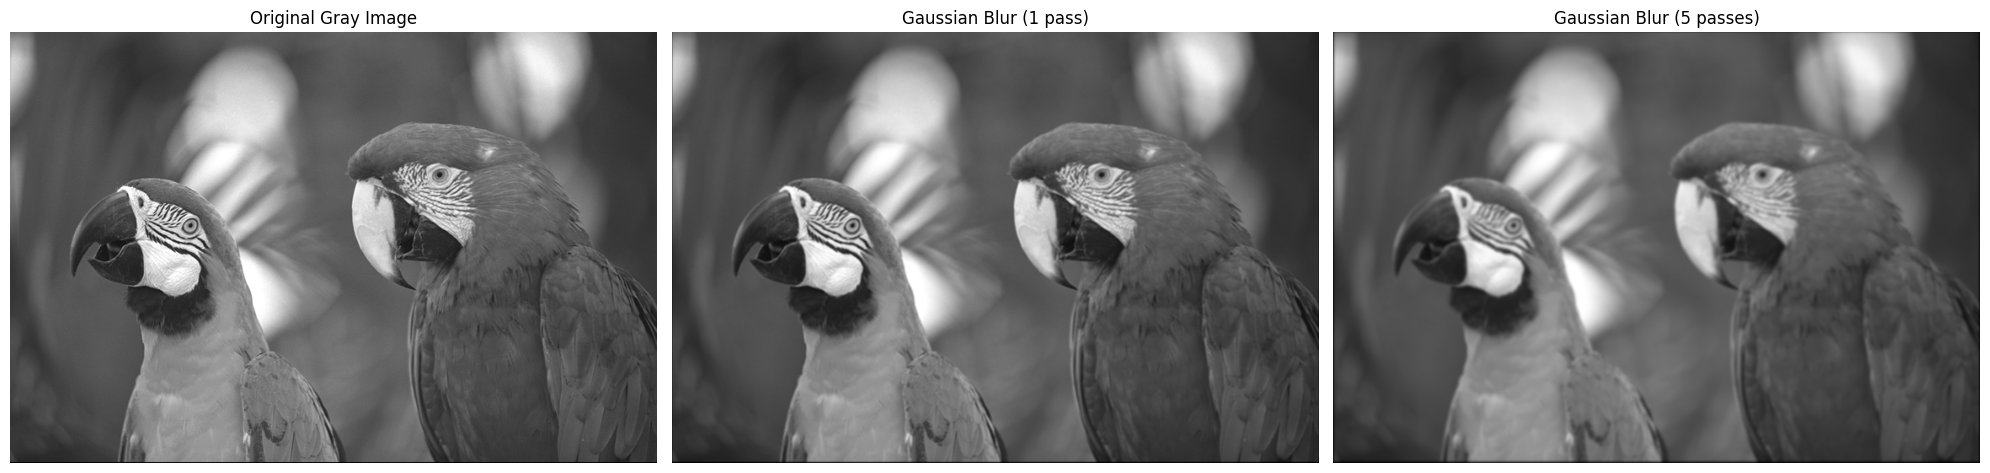

In [44]:
blurred_multiple_times = gray_image.copy()
for _ in range(5): # Apply blur 5 times
    blurred_multiple_times = feature_extractor(blurred_multiple_times, gaussian_blur)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].imshow(gray_image, cmap="gray")
axes[0].set_title("Original Gray Image")
axes[0].axis("off")

axes[1].imshow(feature_extractor(gray_image, gaussian_blur), cmap="gray")
axes[1].set_title("Gaussian Blur (1 pass)")
axes[1].axis("off")

axes[2].imshow(blurred_multiple_times, cmap="gray")
axes[2].set_title("Gaussian Blur (5 passes)")
axes[2].axis("off")

plt.tight_layout()
plt.show()

# 4.Geometric Transformation

In all of the above cases, you performed operations on the pixel value, i.e., photometric transformations. Now for this section, you will apply the transformations on pixel locations, i.e., spatial transformations
It is advised to go through below mentioned references(in order) before proceeding to this section:
1. https://www.youtube.com/watch?v=7liGDs9Vf-I&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=6
2. https://www.youtube.com/watch?v=FleSNIZp2kc&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=8
3. https://www.youtube.com/watch?v=NYkMk17J9O0&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=9
4. https://www.youtube.com/playlist?list=PLfZZTc8qI7Hc7n4Y2xZcfPbsd5K6eMhPE (L09-L13)

### Task 4.1: Image-Translation (In-plane)

Write a function to translate an image by a given direction and plot the original and the translated image

In [84]:
def translate_image(image, shift):
    '''
    Function outputs a translated image
    image: Image
    pixel: (dx, dy) tuple which contains how much the image should translate by in each direction
    '''

    # Ensure the input image is grayscale for easier translation,
    # as the display in the next cell expects a grayscale image.
    is_rgb = len(image.shape) == 3
    if is_rgb:
        gray_image = RGB2Gray(image, "average")
    else:
        gray_image = image

    rows, cols = gray_image.shape
    # Initialize the translated image with zeros (black background)
    translated_image = np.zeros_like(image)

    dy, dx = shift # shift[0] is row shift, shift[1] is column shift

    for r_out in range(rows):
        for c_out in range(cols):
            # Calculate corresponding coordinates in the original image
            r_in = r_out - dy
            c_in = c_out - dx

            # Check if the original coordinates are within the bounds of the original image
            # if 0 <= r_in < rows and 0 <= c_in < cols:
            translated_image[r_out, c_out] = image[r_in, c_in]

    return translated_image

(512, 768, 3)


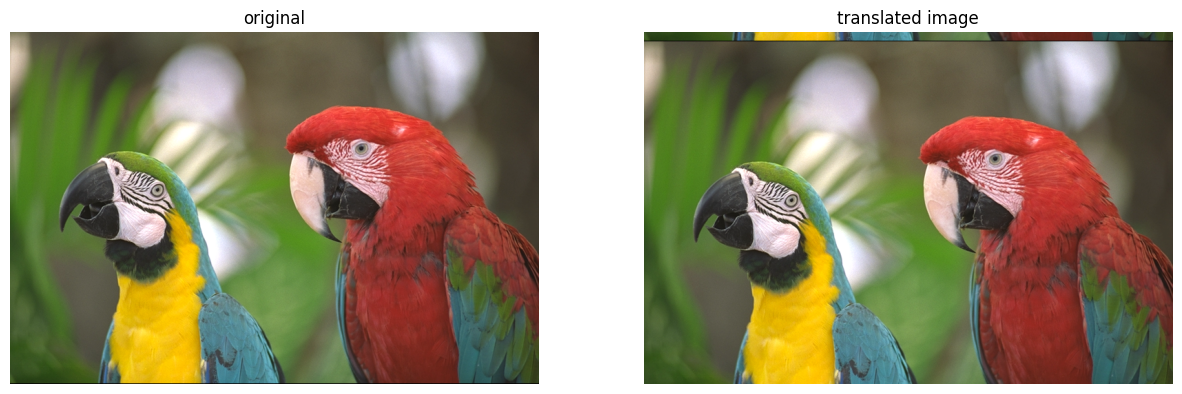

In [92]:
translated_image = translate_image(image, (15,0))
print(translated_image.shape)
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(translated_image, cmap = "gray")
axes[1].set_title("translated image")
axes[1].axis("off")

plt.show()

### Task4.2: Image Rotation (In-plane)

Write a function which rotates an image by 10 degrees in anticlockwise direction. (You can use inbuit functions for this, however it is encouraged to write code from scratch )


In [86]:
import math
def rotate_image(image, angle):
    '''
    Function outputs a rotated image
    image: Image
    angle: Angle of rotation in degrees
    '''
    # Ensure the input image is grayscale for easier translation,
    # as the display in the next cell expects a grayscale image.
    is_rgb = len(image.shape) == 3
    if is_rgb:
        gray_image = RGB2Gray(image, "average")
    else:
        gray_image = image

    # Convert angle to radians
    angle_rad = math.radians(angle)
    cos_a = math.cos(angle_rad)
    sin_a = math.sin(angle_rad)

    # Compute the rotation matrix
    rotation_matrix = np.array([[cos_a, sin_a],
                                [-sin_a, cos_a]])


    rotated_image = np.zeros_like(image)
    height, width = gray_image.shape

    for i in range(height):
        for j in range(width):
            # We treat 'i' as y and 'j' as x
            # Apply matrix multiplication: [x', y'] = R * [x, y]
            # To avoid holes, we still map backward from dest to source
            # So we use the rotation matrix for (-angle)

            coord = np.array([j, i])
            # Inverse rotation: multiply by the transpose of the matrix
            source_coord = rotation_matrix.T @ coord

            src_x, src_y = int(source_coord[0]), int(source_coord[1])

            # Check if the pixel exists in the original image
            if 0 <= src_x < width and 0 <= src_y < height:
                rotated_image[i, j] = image[src_y, src_x]

    return rotated_image




(512, 768, 3)


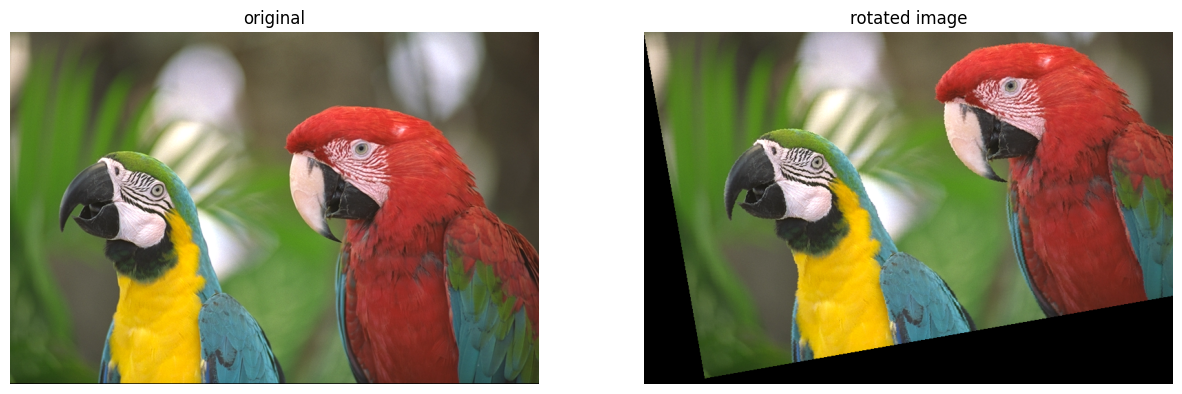

In [87]:
rotated_image = rotate_image(image, 10)
print(rotated_image.shape)
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(rotated_image, cmap = "gray")
axes[1].set_title("rotated image")
axes[1].axis("off")

plt.show()

#### Task 4.3 Translate and rotate


(512, 768, 3)
(512, 768, 3)


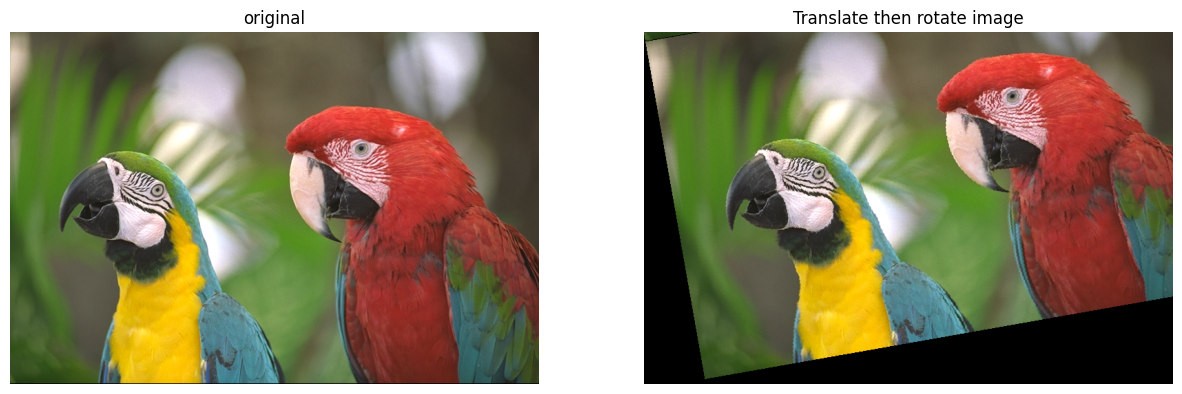

In [88]:
translated_image = translate_image(image, (15,0))
print(translated_image.shape)

rotate_translate = rotate_image(translated_image, 10)
print(rotate_translate.shape)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(rotate_translate, cmap = "gray")
axes[1].set_title("Translate then rotate image")
axes[1].axis("off")

plt.show()

#### Task 4.4 Rotate then translate

(512, 768, 3)
(512, 768, 3)


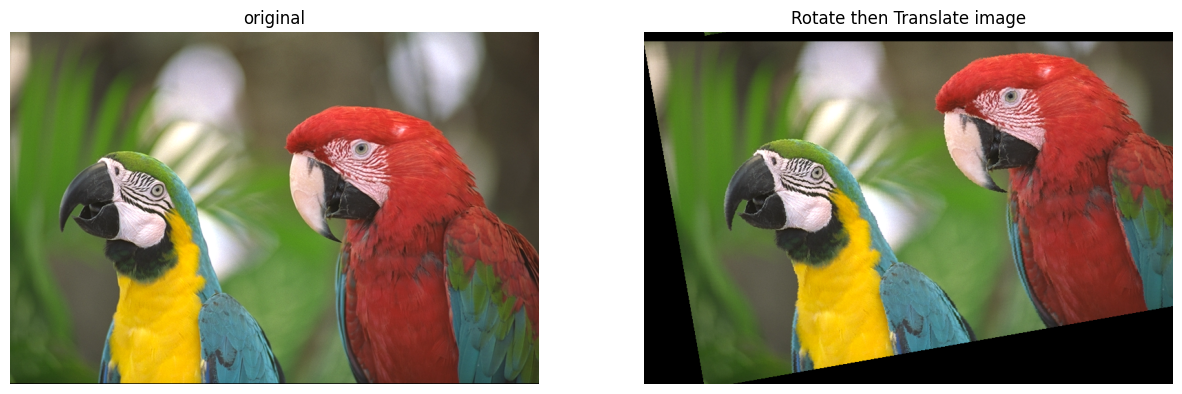

In [90]:
rotated_image = rotate_image(image, 10)
print(rotated_image.shape)

translate_rotate = translate_image(rotated_image, (15,0))
print(translate_rotate.shape)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(translate_rotate, cmap = "gray")
axes[1].set_title("Rotate then Translate image")
axes[1].axis("off")

plt.show()